@describe

다양한 edge detector를 convolution 연산하여 영상에 적용해보기

@get_img_path(src_dir_path, filename)

Image processing에서 원본 이미지는 코드파일이 돌아가는 경로의 하위 디렉터리에 저장하는 경우가 많다. 따라서 get_img_path()함수에서 하위 디렉터리의 이름과 원본 이미지 이름만 입력받도록 하였다.
* src_dir_path : 이미지가 저장되어 있는 하위 디렉터리
* filename : 이미지 이름
* 나의 디렉터리 구조
    ```
    현재 디렉터리(/workspace/Modulabs-Dasol)
    |-- Study
        |-- assets : 이미지 포함(Lena.png)
    |-- F-30 Convolution_Clean.ipynb
    |
    ```
    * 따라서 parameter로 Study/assets, Lena.png 입력

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [3]:
def get_img_path(src_dir_path, filename):
    cnt_path = os.getcwd()
    src_dir = os.path.join(cnt_path, src_dir_path)
    img_path = os.path.join(src_dir, filename)
    
    return img_path

In [4]:
def view_ori_img(img_path):
    img = Image.open(img_path)
    fig = plt.figure(figsize=(15,8))
    ori_img = fig.add_subplot(1,1,1)
    ori_img.imshow(img)
    ori_img.set_title("Original image")

In [5]:
def print_image(mat_x, mat_y):
    fig = plt.figure(figsize=(15,8))
    vertical = fig.add_subplot(1,2,1)
    vertical.imshow(mat_x)

    horizontal = fig.add_subplot(1,2,2)
    horizontal.imshow(mat_y)

In [6]:
def get_filter(name):
    if name == 'basic':
        G_x = np.array([[-1,1]])
        G_y = np.array([[-1],[1]])
    elif name == 'roberts':
        G_x = np.array([[1,0], [0,-1]])
        G_y = np.array([[0,1], [-1,0]])
    elif name == 'prewitt':
        G_x = np.array([[-1,0,1], [-1,0,1], [-1,0,1]])
        G_y = np.array([[-1,-1,-1], [0,0,0], [1,1,1]])
    elif name == 'sobel':
        G_x = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
        G_y = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
    elif name == 'scharr':
        G_x = np.array([[-3,0,3], [-10,0,10], [-3,0,3]])
        G_y = np.array([[-3,-10,-3], [0,0,0], [3,10,3]])
    else:
        print('Done')
        exit()
    
    return G_x, G_y

In [7]:
def filtering(G_x, G_y, img):
    edge_x = cv2.filter2D(img, -1, G_x)
    edge_y = cv2.filter2D(img, -1, G_y)
    
    return edge_x, edge_y

In [8]:
def run(img):
    filter_name = input('Select filter: ')
    kernel = get_filter(filter_name)
    edge = filtering(kernel[0], kernel[1], img)
    
    print_image(edge[0], edge[1])

Input image directory: Study/assets
Input image name: Lena.png
Available filter : basic, roberts, prewitt, sobel, scharr
Select filter: sobel


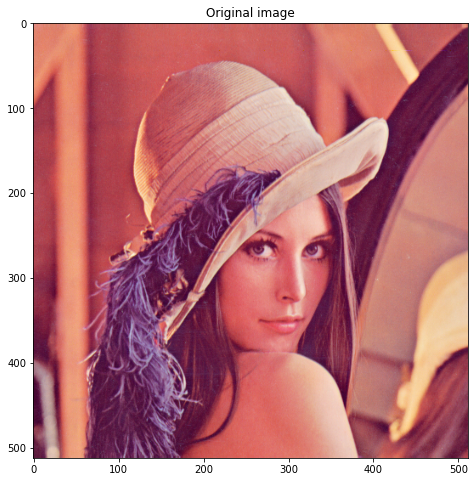

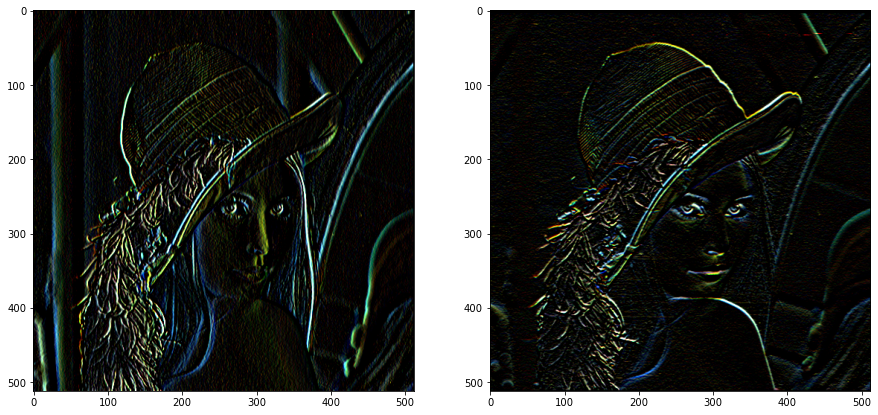

In [9]:
if __name__=='__main__':
    dir_ = input('Input image directory: ')
    name = input('Input image name: ')
    img_path = get_img_path(dir_, name)
    
    img = cv2.imread(img_path)
    view_ori_img(img_path)

    print('Available filter : basic, roberts, prewitt, sobel, scharr')
    run(img)